# Chapter 22: Training Nonlinear Classifiers with Decision Tree Techniques

## 22.1 Automated Learning of Logical Rules

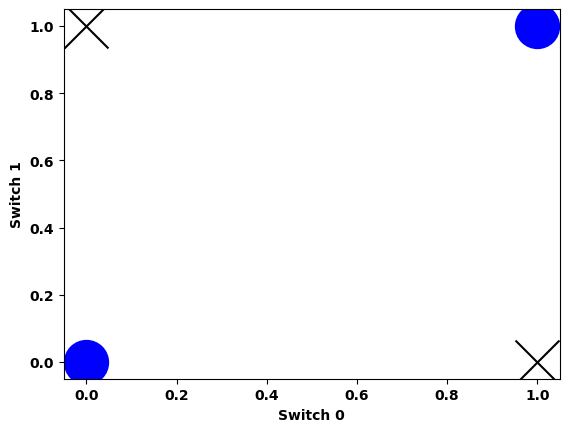

In [1]:
# Plotting the two-switch problem in 2D space
import numpy as np
import matplotlib.pyplot as plt
X = np.array([[0, 0], [1, 0], [0, 1], [1, 1]])
y = (X[:,0] + X[:,1] == 1).astype(int)

for i in [0, 1]:
    plt.scatter(X[y == i][:,0], X[y == i][:,1], marker=['o', 'x'][i], color=['b', 'k'][i], s=1000)

plt.xlabel('Switch 0')
plt.ylabel('Switch 1')
plt.show()

In [3]:
# Classifying data using nested if/else statements
def classify(features):
    switch0, switch1 = features

    if switch0 == 0:
        if switch1 == 0:
            prediction = 0
        else:
            prediction = 1
    else:
        if switch1 == 0:
            prediction = 1
        else:
            prediction = 0

    return prediction

for i in range(X.shape[0]):
    assert classify(X[i]) == y[i]

In [4]:
# Generating a single-switch training set
np.random.seed(0)
y_simple = np.random.binomial(1, 0.5, size=10)
X_simple = np.array([[e] for e in y_simple])
print(f"features: {X_simple}")
print(f"\nlabels: {y_simple}")

features: [[1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]]

labels: [1 1 1 1 0 1 0 1 1 0]


In [5]:
# Counting the off-state co-occurrences
count = (X_simple[:,0][y_simple == 0] == 0).sum()
print(f"In {count} instances, both the switch and the light are off")

In 3 instances, both the switch and the light are off


In [6]:
# Counting the on-state co-occurrences
count = (X_simple[:,0][y_simple == 1] == 1).sum()
print(f"In {count} instances, both the switch and the light are on")

In 7 instances, both the switch and the light are on


In [7]:
# Computing a co-occurance matrix
def get_co_occurence(X, y, col=0):
    co_occurence = []
    for i in [0, 1]:
        counts = [(X[:,col][y == i] == j).sum() for j in [0, 1]]
        co_occurence.append(counts)

    return np.array(co_occurence)

M = get_co_occurence(X_simple, y_simple)
assert M[0][0] == 3
assert M[1][1] == 7

In [8]:
# Adding a flawed mismatch to the data
X_simple = np.vstack([X_simple, [1]])
y_simple = np.hstack([y_simple, [0]])
M = get_co_occurence(X_simple, y_simple)
print(M)

[[3 1]
 [0 7]]


In [10]:
# Computing bulb probabilities when the switch is off
bulb_probs = M[0] / M[0].sum()
print("When the switch is set to 0, the bulb state probabilities are:")
print(bulb_probs)

prob_on, prob_off = bulb_probs
print(f"\nThere is a {100 * prob_on:.0f}% chance that the bulb is off.")
print(f"There is a {100 * prob_off:.0f}% chance that the bulb is on.")

When the switch is set to 0, the bulb state probabilities are:
[0.75 0.25]

There is a 75% chance that the bulb is off.
There is a 25% chance that the bulb is on.


In [11]:
# Predicting the state of the bulb when the switch is on
bulb_probs = M[1] / M[1].sum()
print("When the switch is set to 1, the bulb state probabilities are:")
print(bulb_probs)

prediction = ['off', 'on'][bulb_probs.argmax()]
accuracy = bulb_probs.max()
print(f"\nWe assume the bulb is {prediction} with {100 * accuracy:.0f}% accuracy")

When the switch is set to 1, the bulb state probabilities are:
[0. 1.]

We assume the bulb is on with 100% accuracy


In [12]:
# Counting the on and off states of the switch 
for i, count in enumerate(M.sum(axis=1)):
    state = ['off', 'on'][i]
    print(f"The switch is {state} in {count} observations.")

The switch is off in 4 observations.
The switch is on in 7 observations.


In [13]:
# Computing total accuracy (with weights)
accuracies = [0.75, 1.0]
total_accuracy = np.average(accuracies, weights=M.sum(axis=1))
print(f"Our total accuracy is {100 * total_accuracy:.0f}%")

Our total accuracy is 91%


In [15]:
# Training a simple if/else model
def train_if_else(X, y, feature_col=0, feature_name='feature'):
    M = get_co_occurence(X, y, col=feature_col)
    probs0, probs1 = [M[i] / M[i].sum() for i in [0, 1]]

    if_else = f"""if {feature_name} == 0:
    prediction = {probs0.argmax()}
else:
    prediction = {probs1.argmax()}
    """.strip()

    if probs0.argmax() == probs1.argmax():
        if_else = f"prediction = {probs0.argmax()}"

    accuracies = [probs0.max(), probs1.max()]
    total_accuracy = np.average(accuracies, weights=M.sum(axis=1))
    return if_else, total_accuracy

if_else, accuracy = train_if_else(X_simple, y_simple, feature_name='switch')
print(if_else)
print(f"\nThis statement is {100 * accuracy:.0f}% accurate.")

if switch == 0:
    prediction = 0
else:
    prediction = 1

This statement is 91% accurate.


### 22.1.1 Training a nested if/else model using two features